
# Law Replication: Critical Temperatures and Pressures of H2-Air & Me-Air Mixtures

Burke Mechanism: \
https://burke.me.columbia.edu/sites/burke.me.columbia.edu/files/content/chem_cti.txt

Cantera Critical State Properties: \
https://cantera.org/stable/examples/python/thermo/critical_properties.html

Coolprop Cubic EOS & Mixture Handling: \
http://www.coolprop.org/coolprop/Cubics.html \
http://www.coolprop.org/dev/fluid_properties/Mixtures.html

Coolprop Low Level Interface: \
http://www.coolprop.org/coolprop/LowLevelAPI.html

In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI

First I am comparing the Critical Properties of Pure fluids between Canteras built-in EOSs and Coolprops EOS, to get a baseline. \
The code is analogous to Canteras Critical State Properties example

In [2]:
fluids = {'N2': ct.Nitrogen(),
          'CH4': ct.Methane(),
          'H2': ct.Hydrogen(),
          'O2': ct.Oxygen(),
          }
print('Critical State Properties')
print(f"{'Fluid':^16s}   {'Tc [K]':^7s}   {'Pc [Atm]':^10s}   {'Zc':^7s}")
print(f"{'-'*16}   {'-'*7}   {'-'*10}   {'-'*7}")

for name in fluids:
    f = fluids[name]
    tc = f.critical_temperature
    pc = f.critical_pressure
    rc = f.critical_density
    mw = f.mean_molecular_weight # kg/kmol
    zc = pc * mw / (rc * ct.gas_constant * tc)
    print(f'{name:16s}   {tc:7.2f}   {pc/101325:10.4g}   {zc:7.4f}')


# PropsSI doesn't like using indexes in its function
# Instead I am going trough each gas manually, 1 to 5

print()
print('Critical State Properties in Coolprop')
print(f"{'Fluid':^16s}   {'Tc [K]':^7s}   {'Pc [Pa]':^10s}   {'Zc':^7s}")
print(f"{'-'*16}   {'-'*7}   {'-'*10}   {'-'*7}")

name1 = 'CP_N2'
tc1 = PropsSI("Tcrit", "P", 101325, "T", 300, "N2")
pc1 = PropsSI("pcrit", "P", 101325, "T", 300, "N2")
rc1 = PropsSI("rhocrit", "P", 101325, "T", 300, "N2")
mw1 = PropsSI("molemass", "P", 101325, "T", 300, "N2") # kg/mol
zc1 = pc1 * mw1 * 1000 / (rc1 * ct.gas_constant * tc1) # Increased by a factor of 1000 due to unit change
print(f'{name1:16s}   {tc1:7.2f}   {pc1/101325:10.4g}   {zc1:7.4f}')

name2 = 'CP_CH4'
tc2 = PropsSI("Tcrit", "P", 101325, "T", 300, "CH4")
pc2 = PropsSI("pcrit", "P", 101325, "T", 300, "CH4")
rc2 = PropsSI("rhocrit", "P", 101325, "T", 300, "CH4")
mw2 = PropsSI("molemass", "P", 101325, "T", 300, "CH4")
zc2 = pc2 * mw2 * 1000 / (rc2 * ct.gas_constant * tc2)
print(f'{name2:16s}   {tc2:7.2f}   {pc2/101325:10.4g}   {zc2:7.4f}')

name3 = 'CP_H2'
tc3 = PropsSI("Tcrit", "P", 101325, "T", 300, "H2")
pc3 = PropsSI("pcrit", "P", 101325, "T", 300, "H2")
rc3 = PropsSI("rhocrit", "P", 101325, "T", 300, "H2")
mw3 = PropsSI("molemass", "P", 101325, "T", 300, "H2")
zc3 = pc3 * mw3 * 1000 / (rc3 * ct.gas_constant * tc3)
print(f'{name3:16s}   {tc3:7.2f}   {pc3/101325:10.4g}   {zc3:7.4f}')

name4 = 'CP_O2'
tc4 = PropsSI("Tcrit", "P", 101325, "T", 300, "O2")
pc4 = PropsSI("pcrit", "P", 101325, "T", 300, "O2")
rc4 = PropsSI("rhocrit", "P", 101325, "T", 300, "O2")
mw4 = PropsSI("molemass", "P", 101325, "T", 300, "O2")
zc4 = pc4 * mw4 * 1000 / (rc4 * ct.gas_constant * tc4)
print(f'{name4:16s}   {tc4:7.2f}   {pc4/101325:10.4g}   {zc4:7.4f}')

name5 = 'CP_Air' # Present in Coolprop
tc5 = PropsSI("Tcrit", "P", 101325, "T", 300, "Air")
pc5 = PropsSI("pcrit", "P", 101325, "T", 300, "Air")
rc5 = PropsSI("rhocrit", "P", 101325, "T", 300, "Air")
mw5 = PropsSI("molemass", "P", 101325, "T", 300, "Air")
zc5 = pc5 * mw5 * 1000 / (rc5 * ct.gas_constant * tc5)
print(f'{name5:16s}   {tc5:7.2f}   {pc5/101325:10.4g}   {zc5:7.4f}')

Critical State Properties
     Fluid         Tc [K]     Pc [Atm]      Zc   
----------------   -------   ----------   -------
N2                  126.20        33.56    0.2891
CH4                 190.56        45.39    0.2904
H2                   32.94        12.67    0.3013
O2                  154.58        49.77    0.2879

Critical State Properties in Coolprop
     Fluid         Tc [K]     Pc [Pa]       Zc   
----------------   -------   ----------   -------
CP_N2               126.19        33.51    0.2894
CP_CH4              190.56        45.39    0.2863
CP_H2                33.15        12.79    0.3033
CP_O2               154.58        49.77    0.2879
CP_Air              132.53        37.36    0.2904


These values are negligibly different.

Now to calculate critical properties of Mixtures: \
Critical properties in Mixtures are not implemented in Cantera, as seen below

In [4]:
gas1 = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas1.TP = 101325, 300
gas1.set_equivalence_ratio(1, fuel, oxidizer)
#gas1.critical_temperature()
#gas1.critical_pressure()

http://www.coolprop.org/coolprop/Cubics.html#mixtures
Instead, we will utilize CoolProps Low-Level interface to do the calculations.

In [5]:
gas1 = ct.Solution('gri30.yaml')
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas1.TP = 101325, 300
gas1.set_equivalence_ratio(1, fuel, oxidizer)

#After setting the equivalence ratio, the molar fractions get automatically adjusted, and can be obtained with gas1.X[species_index]
#The species index is obtained with gas1.X[gas1.species_index('GAS')]
#This will be used in the low level CoolProp interface below, by setting up an AbstractState (similar to cantera multifluid Object)
# The High Level PropsSI function is not usable, since it does not accept gas object indeces as an input

print('Critical State Properties of Hydrogen-Air in Coolprop using different Backends:')
print('Hydrogen SRK:')
AS = CP.AbstractState("SRK", "Nitrogen&Hydrogen&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('H2')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)
print('Hydrogen PR:')
AS = CP.AbstractState("PR", "Nitrogen&Hydrogen&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('H2')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)
print('Hydrogen HEOS:')
AS = CP.AbstractState("HEOS", "Nitrogen&Hydrogen&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('H2')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)

fuel2 = 'CH4:1'
gas1.set_equivalence_ratio(1, fuel2, oxidizer)
print('Methane SRK:')
AS = CP.AbstractState("SRK", "Nitrogen&Methane&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('CH4')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)
print('Methane PR:')
AS = CP.AbstractState("PR", "Nitrogen&Methane&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('CH4')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)
print('Methane HEOS:')
AS = CP.AbstractState("HEOS", "Nitrogen&Methane&Oxygen")
AS.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('CH4')],gas1.X[gas1.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p / 101325)

Critical State Properties of Hydrogen-Air in Coolprop using different Backends:
Hydrogen SRK:
120.17183929788499
67.70122013450785
Hydrogen PR:
119.49665108532542
65.77011694027284
Hydrogen HEOS:
126.05583339608778
102.94691284011917
Methane SRK:
138.98817009854451
41.14460372098934
18.410575152253134
-1081.9140763288628
Methane PR:
138.8881782344944
41.08612216960375
Methane HEOS:


ValueError: No density solutions for T=28.5132,p=1.35739e+08,z=[ 0.0806340879968, 0.300057241091, 0.619308670912 ]

The all_critical_points routine is far from perfect, giving multiple critical Pressures/Temperatures for some equivalence ratios, or even outright failing to give any results.
The choice of backend affects the results, with SRK and PR being similar to each other, and HEOS using Helmholtz mixing for its predictions

All backends predict a higher Pcrit for Hydrogen than the one obtained by Law et al. \
This difference can be explained due to the different Hydrogen EOS used in Coolprop, by Leachmann et al (https://doi.org/10.1063/1.3160306), instead of the Burke Mechanism used by Law et al.

Before trying workarounds, we will first finalize the Methane Comparison:

In [7]:
phi = np.linspace(0.6,2, 29)
print (phi)

[0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25
 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95
 2.  ]


In [8]:
gas2 = ct.Solution('gri30.yaml')
fuel = 'CH4:1'
oxidizer = 'O2:0.21,N2:0.79'
gas2.TP = 101325, 300

#Setting up arrays to save the values in
T_crit_list = []
p_crit_list = []

#Main Loop
for i in phi:
    gas2.set_equivalence_ratio(i, fuel, oxidizer)
    AS5 = CP.AbstractState("SRK", "N2&CH4&O2")
    AS5.set_mole_fractions([gas2.X[gas2.species_index('N2')],gas2.X[gas2.species_index('CH4')], gas2.X[gas2.species_index('O2')]])
    pts5 = AS5.all_critical_points()
    k = 0
    for pt5 in pts5:
        if k < 1: #This is used to save only the first obtained value, discarding other potentially bogus values
            T_crit_list.append (pt5.T)
            p_crit_list.append (pt5.p / 101325)
            k=k+1
print (T_crit_list)
print (p_crit_list)

[136.32418208161772, 136.67252630429152, 137.01627874508077, 137.35554807045602, 137.6904387671385, 138.02105135102852, 138.34748256483925, 138.66982556502177, 138.98817009854451, 139.3026026700651, 139.61320670000552, 139.92006267402257, 140.22324828433702, 140.5228385633663, 140.8189060100815, 141.11152070949032, 141.40075044562485, 141.68666080839623, 141.96931529465797, 142.24877540380132, 142.5251007281906, 142.79834903872893, 143.06857636582802, 143.33583707604348, 143.6001839446201, 143.86166822417945, 144.1203397097689, 144.3762468004791, 144.6294365578244]
[39.636086073079895, 39.83688930612732, 40.0340635186151, 40.22767661336463, 40.41779505959608, 40.604483931916775, 40.787806948249646, 40.967826506651825, 41.14460372098934, 41.31819845545303, 41.48866935790361, 41.656073892056895, 41.82046836851627, 41.9819079746753, 42.14044680351266, 42.29613788131307, 42.44903319434293, 42.599183714519434, 42.74663942411004, 42.89144933949884, 43.03366153406238, 43.17332316019215, 43.31

To compare to Laws data, we used WebPlotDigitizer (https://apps.automeris.io/wpd4/) \
The Obtained data values are saved in the CSV format and need to be importet before being used


In [9]:
# !pip install pandas
import pandas as pd

CH4_critP = pd.read_csv('Extracted Plots/Law_Fig2_CH4.csv')
CH4_critP.head() #Looks good

,phi,p,T
0,0.60,39.041106,135.336486
1,0.65,39.219932,135.712842
2,0.70,39.438490,136.066517
3,0.75,39.634464,136.435296
4,0.80,39.826543,136.787932


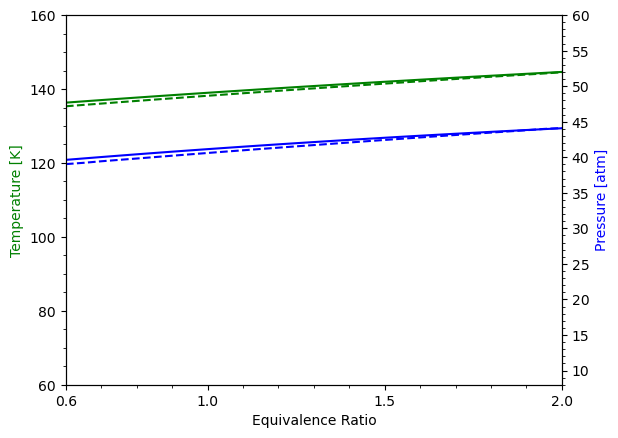

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(phi,T_crit_list, 'g-', label='$Critical Temperature$')
ax1.plot(CH4_critP['phi'], CH4_critP['T'], 'g--', label='$Reference Critical Pressure$')
ax2.plot(phi,p_crit_list, 'b-', label='$Critical Pressure$')
ax2.plot(CH4_critP['phi'], CH4_critP['p'], 'b--', label='$Reference Critical Pressure$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Temperature [K]', color='g')
ax2.set_ylabel('Pressure [atm]', color='b')
ax1.set_xlim(0.6, 2)
ax1.set_ylim(60, 160)
ax2.set_xlim(0.6, 2)
ax2.set_ylim(8, 60)
ax1.set_xticks([0.6, 1, 1.5, 2])
ax1.set_yticks([60, 80, 100, 120, 140, 160])
ax2.set_yticks([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax1.minorticks_on()
ax2.minorticks_on()
plt.show()

Now lets see how off we are with Hydrogen:

In [11]:
fuel2 = 'H2:1'

#Setting up arrays to save the values in
T_crit_list2 = []
p_crit_list2 = []

#Main Loop
for i in phi:
    gas2.set_equivalence_ratio(i, fuel2, oxidizer)
    AS5 = CP.AbstractState("SRK", "N2&H2&O2")
    AS5.set_mole_fractions([gas2.X[gas2.species_index('N2')],gas2.X[gas2.species_index('H2')], gas2.X[gas2.species_index('O2')]])
    pts5 = AS5.all_critical_points()
    k = 0
    for pt5 in pts5:
        if k < 1:
            T_crit_list2.append (pt5.T)
            p_crit_list2.append (pt5.p / 101325)
            k=k+1
print (T_crit_list)
print (p_crit_list)

[136.32418208161772, 136.67252630429152, 137.01627874508077, 137.35554807045602, 137.6904387671385, 138.02105135102852, 138.34748256483925, 138.66982556502177, 138.98817009854451, 139.3026026700651, 139.61320670000552, 139.92006267402257, 140.22324828433702, 140.5228385633663, 140.8189060100815, 141.11152070949032, 141.40075044562485, 141.68666080839623, 141.96931529465797, 142.24877540380132, 142.5251007281906, 142.79834903872893, 143.06857636582802, 143.33583707604348, 143.6001839446201, 143.86166822417945, 144.1203397097689, 144.3762468004791, 144.6294365578244]
[39.636086073079895, 39.83688930612732, 40.0340635186151, 40.22767661336463, 40.41779505959608, 40.604483931916775, 40.787806948249646, 40.967826506651825, 41.14460372098934, 41.31819845545303, 41.48866935790361, 41.656073892056895, 41.82046836851627, 41.9819079746753, 42.14044680351266, 42.29613788131307, 42.44903319434293, 42.599183714519434, 42.74663942411004, 42.89144933949884, 43.03366153406238, 43.17332316019215, 43.31

In [12]:
H2_critP = pd.read_csv('Extracted Plots/Law_Fig2_H2.csv')
H2_critP.head() #Looks good

,phi,p,T
0,0.60,25.837759,108.611254
1,0.65,25.190512,107.140606
2,0.70,24.526053,105.706336
3,0.75,23.915836,104.376376
4,0.80,23.305619,103.020338


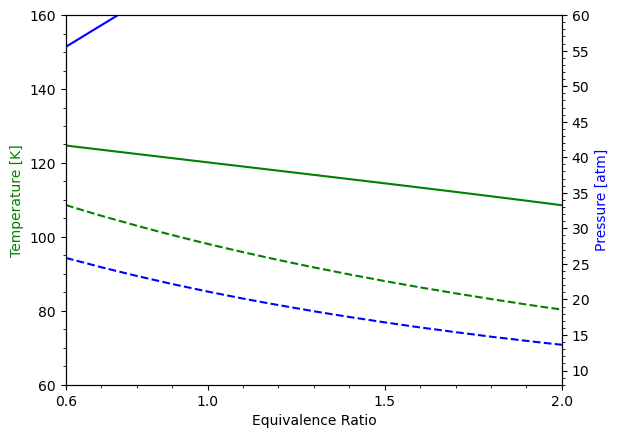

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(phi,T_crit_list2, 'g-', label='$Critical Temperature$')
ax1.plot(H2_critP['phi'], H2_critP['T'], 'g--', label='$Reference Critical Pressure$')
ax2.plot(phi,p_crit_list2, 'b-', label='$Critical Pressure$')
ax2.plot(H2_critP['phi'], H2_critP['p'], 'b--', label='$Reference Critical Pressure$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Temperature [K]', color='g')
ax2.set_ylabel('Pressure [atm]', color='b')
ax1.set_xlim(0.6, 2)
ax1.set_ylim(60, 160)
ax2.set_xlim(0.6, 2)
ax2.set_ylim(8, 60)
ax1.set_xticks([0.6, 1, 1.5, 2])
ax1.set_yticks([60, 80, 100, 120, 140, 160])
ax2.set_yticks([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax1.minorticks_on()
ax2.minorticks_on()
plt.show()

The difference in Mechanisms is apparent!

In [33]:
AS3 = CP.AbstractState("HEOS", "Air&Hydrogen")

ValueError: Could not match the binary pair [1333-74-0,AIR.PPF] - for now this is an error.

This error means a lack of binary interaction parameters! \
Lets try adding some:

In [11]:
CAS_H = CP.get_fluid_param_string('Hydrogen','CAS')
CAS_Air = CP.get_fluid_param_string('Air','CAS')

# Incase this is initialized more than once (code rerun)
# Sets the configuration flag to TRUE to allow binary interaction parameters to be over-written
CP.set_config_bool(CP.OVERWRITE_BINARY_INTERACTION, True)

# This adds beta and gamma parameters in the library of interaction parameters
# 2 methods are possible, linear (Tr and Vr are linear functions of the pure fluid values weighed by the mixtures molar composition)
# and Lorenty-Berthelot (all inteaction parameters = 1)
CP.apply_simple_mixing_rule(CAS_H, CAS_Air, 'Lorentz-Berthelot')

# Set the configuration flag back to FALSE
CP.set_config_bool(CP.OVERWRITE_BINARY_INTERACTION, False)

In [13]:
AS3 = CP.AbstractState("HEOS", "Air&Hydrogen")
AS3.set_mole_fractions([gas1.X[gas1.species_index('N2')]+gas1.X[gas1.species_index('O2')],gas1.X[gas1.species_index('H2')]])#same as above, but adding the N2 and O2 mole fractions to get Air
pts3 = AS3.all_critical_points()
for pt3 in pts3:
    print (pt3.T)
    print (pt3.p / 101325)

127.60622753045779
155.6063284687473


Lorentz-Berthelot fits excellently for Hydrogen-Oxygen (at 1), well for Oxygen-Nitrogen (close to 1),\
but not well enough for Hydrogen-Nitrogen. \
(see http://www.coolprop.org/dev/fluid_properties/Mixtures.html#binary-pairs)

We can approximate slightly better interaction parameters by interpolating the values given by CoolProp. \
First we query the values from the AbstractState objects like so:

In [14]:
O2N2 = CP.AbstractState("HEOS", "Oxygen&Nitrogen")
bT = O2N2.get_binary_interaction_double(0, 1, 'betaT')
print (bT)

1.0028173260267301


Then simply calculate the mean:

In [15]:
O2N2 = CP.AbstractState("HEOS", "Oxygen&Nitrogen")
H2N2 = CP.AbstractState("HEOS", "Hydrogen&Nitrogen")

bT = (1/2)*(O2N2.get_binary_interaction_double(0, 1, 'betaT')+H2N2.get_binary_interaction_double(0, 1, 'betaT'))
bV = (1/2)*(O2N2.get_binary_interaction_double(0, 1, 'betaV')+H2N2.get_binary_interaction_double(0, 1, 'betaV'))
gT = (1/2)*(O2N2.get_binary_interaction_double(0, 1, 'gammaT')+H2N2.get_binary_interaction_double(0, 1, 'gammaT'))
gV = (1/2)*(O2N2.get_binary_interaction_double(0, 1, 'gammaV')+H2N2.get_binary_interaction_double(0, 1, 'gammaV'))

print (bT,bV,gT,gV)

1.0298748442381143 1.0143610954039715 1.0854268135 0.9835988425


In [16]:
#Setting the interaction parameters in Coolprops low level interface
CP.set_mixture_binary_pair_data(CAS_H, CAS_Air, 'betaT', bT)
CP.set_mixture_binary_pair_data(CAS_H, CAS_Air, 'gammaT', gT)
CP.set_mixture_binary_pair_data(CAS_H, CAS_Air, 'betaV', bV)
CP.set_mixture_binary_pair_data(CAS_H, CAS_Air, 'gammaV', gV)

In [18]:
AS4 = CP.AbstractState("HEOS", "Air&Hydrogen")
AS4.set_mole_fractions([gas1.X[gas1.species_index('N2')]+gas1.X[gas1.species_index('O2')],gas1.X[gas1.species_index('H2')]])
pts4 = AS4.all_critical_points()
for pt4 in pts4:
    print (pt4.T)
    print (pt4.p / 101325)

AS4 = CP.AbstractState("HEOS", "Nitrogen&Oxygen&Hydrogen")
AS4.set_mole_fractions([gas1.X[gas1.species_index('N2')],gas1.X[gas1.species_index('O2')],gas1.X[gas1.species_index('H2')]])
pts4 = AS4.all_critical_points()
for pt4 in pts4:
    print (pt4.T)
    print (pt4.p / 101325)

126.02852928656733
107.09292409100547
126.05583339608769
102.94691284011886


In [19]:
AS3 = CP.AbstractState("SRK", "Air&Hydrogen")

ValueError: Fluid identifier [AIR] was not found in CubicsLibrary

To get SRK to work requires us to implement Air as a Coolprop Cubic Fluid \
The full scheme is available in http://www.coolprop.org/coolprop/Cubics.html#cubic-backend \
Air values were obtained from https://github.com/CoolProp/CoolProp/blob/master/dev/fluids/Air.json

In [20]:
import CoolProp.CoolProp as CP, json
cubic_air = [
                  {
                    "CAS": "132259-10-0",
                    "Tc": 132.5306,
                    "Tc_units": "K",
                    "acentric": 0.0335,
                    "aliases": [
                    ],
                    "molemass": 0.02896546,
                    "molemass_units": "kg/mol",
                    "name": "CUBICAIR",
                    "pc": 3786000.0,
                    "pc_units": "Pa"
                  }
              ]
# SRK and PR use the same backend, so we only need to add the fluid to 1:
CP.add_fluids_as_JSON("PR", json.dumps(cubic_air))

# Put in Lorentz-Berthelot interaction parameters (all beta and gamma values are 1.0), only needs to be executed once
# Toggle the overwrite Interaction flag, to enable writing data
CP.set_config_bool(CP.OVERWRITE_BINARY_INTERACTION, True)
CP.apply_simple_mixing_rule("132259-10-0", CP.get_fluid_param_string("Hydrogen","CAS"), "Lorentz-Berthelot")
CP.set_config_bool(CP.OVERWRITE_BINARY_INTERACTION, False)

AS5 = CP.AbstractState("SRK", "CUBICAIR&Hydrogen")
AS5.set_mole_fractions([gas1.X[gas1.species_index('N2')]+gas1.X[gas1.species_index('O2')],gas1.X[gas1.species_index('H2')]])
pts5 = AS5.all_critical_points()
for pt5 in pts5:
    print (pt5.T)
    print (pt5.p / 101325)

121.42999818460764
57.945112153183004
120.99651058181163
68.2747733031298


To make a graph, we need to run this for multiple equivalence ratios:

In [22]:
phi = np.linspace(0.6,2, 15)
print (phi)

[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


In [24]:
gas2 = ct.Solution('gri30.yaml')
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas2.TP = 101325, 300

#Setting up arrays to save the values in
T_crit_list = []
p_crit_list = []
T_crit_list2 = []
p_crit_list2 = []

#Main Loop
for i in phi:
    gas2.set_equivalence_ratio(i, fuel, oxidizer)
    AS5 = CP.AbstractState("SRK", "Nitrogen&Hydrogen&Oxygen")
    AS5.set_mole_fractions([gas2.X[gas2.species_index('N2')],gas2.X[gas2.species_index('H2')], gas2.X[gas2.species_index('O2')]])
    AS6 = CP.AbstractState("SRK", "CUBICAIR&Hydrogen")
    AS6.set_mole_fractions([gas2.X[gas2.species_index('N2')]+gas2.X[gas2.species_index('O2')],gas2.X[gas2.species_index('H2')]]) #Again, O2+N2 fractions = Air molar fraction
    AS6.set_binary_interaction_double(0,1,"kij",-1.5)
    pts5 = AS5.all_critical_points()
    pts6 = AS6.all_critical_points()
    k = 0
    for pt5 in pts5:
        if k < 1:
            T_crit_list.append (pt5.T)
            p_crit_list.append (pt5.p / 101325)
            k=k+1
    k = 0
    for pt6 in pts6:
        if k < 1:
            T_crit_list2.append (pt6.T)
            p_crit_list2.append (pt6.p / 101325)
            k=k+1
print (T_crit_list)
print (p_crit_list)
print (T_crit_list2)
print (p_crit_list2)

[124.7152629381777, 123.57323961739452, 122.43622072839686, 121.30288784711891, 120.17183929788499, 119.0415701689991, 117.9104480285353, 116.77668301674481, 115.63829050505308, 114.49304380563983, 113.33841337154954, 112.17148735049005, 110.98886591735129, 109.78651793907211, 108.55958219019371]
[55.541456894386506, 58.58164450861307, 61.617551308440504, 64.6552187694367, 67.70122013450785, 70.76278671713216, 73.84796503470415, 76.9658149037248, 80.12666263538324, 83.34242939946876, 86.62706377567868, 89.99712132739347, 93.47255589390114, 97.07782286744009, 100.84345446216176]
[132.747519525815, 132.50617069625577, 132.22843530797306, 131.92199474537244, 131.59282232756283, 131.24562267189353, 130.88414213504913, 130.51139257156296, 130.12981547729515, 129.7414043017735, 129.34779687669345, 128.95034614855584, 128.55017492884375, 128.1482187139255, 127.74525949159187]
[40.14492598543053, 40.635525487912105, 41.14557451793429, 41.6740583546945, 42.21945960780229, 42.78003841584107, 43.

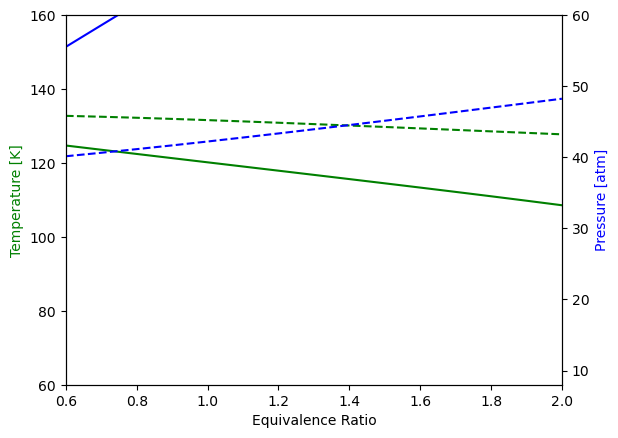

In [25]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(phi,T_crit_list, 'g-', label='$Critical Temperature$')
ax2.plot(phi,p_crit_list, 'b-', label='$Critical Pressure$')
ax1.plot(phi,T_crit_list2, 'g--', label='$Critical Temperature with CUBICAIR$') 
ax2.plot(phi,p_crit_list2, 'b--', label='$Critical Pressure with CUBICAIR$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Temperature [K]', color='g')
ax2.set_ylabel('Pressure [atm]', color='b')
ax1.set_xlim(0.6, 2)
ax1.set_ylim(60, 160)
ax2.set_xlim(0.6, 2)
ax2.set_ylim(8, 60)

plt.show()

What is going on? T behaves as expected (lower T with higher phi), p does not behave as expected

To confirm my suspicions, the following will only mix H2 and O2

In [45]:
AS2 = CP.AbstractState("SRK", "Hydrogen&Oxygen")
AS2.set_mole_fractions([0.3,0.7])
AS2.set_binary_interaction_double(0,1,"kij",-0.5)
pts2 = AS2.all_critical_points()
for pt2 in pts2:
    print (pt2.T)
    print (pt2.p / 101325)

139.886267860536
69.61162109809128


In [46]:
# To not implement my own stoichiometry calculations, 
# I am querying the mixture composition from the gas object after set_equivalence_ratio
gas2 = ct.Solution('gri30.yaml')
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas2.TP = 101325, 300
gas2.set_equivalence_ratio(1, fuel, oxidizer)


#print(gas2())
#After setting the ratio, the molar fractions get automatically adjusted, and can be obtained with gas2.X[species_index]
#The species index is obtained with gas2.species_index('GAS')
#print(gas2.X[47])
# The index 47 stands for N2, 0 for H2 and 3 for O2

# The following uses the low level CoolProp interface, by setting up an SRK AbstractState (similar to cantera multifluid Object)
# Then inputting mole fractions obtained in the Gas Object
AS = CP.AbstractState("SRK", "N2&H2&O2")
AS.set_mole_fractions([gas2.X[gas2.species_index('N2')],gas2.X[gas2.species_index('H2')],gas2.X[gas2.species_index('O2')]])
pts = AS.all_critical_points()
for pt in pts:
    print (pt.T)
    print (pt.p)


# The High Level PropsSI function is not usable, since it does not accept gas object indeces as input
# Uncomment the following code to see what I mean
# PropsSI("Tcrit", "P", 101325, "T", 300, "SRK::Hydrogen[gas2.X[0]]&Oxygen[gas2.X[3]]&Nitrogen[gas2.X[47]]")

120.17183929788499
6859826.130129008


In [47]:
#Setting up arrays to save the values in
T_crit_list = []
p_crit_list = []

#Main Loop
for i in phi:
    gas2.set_equivalence_ratio(i, fuel, oxidizer)
    AS5 = CP.AbstractState("SRK", "Nitrogen&Hydrogen&Oxygen")
    AS5.set_mole_fractions([gas2.X[gas2.species_index('N2')],gas2.X[gas2.species_index('H2')],gas2.X[gas2.species_index('O2')]])
    pts5 = AS5.all_critical_points()
    for pt5 in pts5:
        if pt5.p > 0:
            T_crit_list.append (pt5.T)
            p_crit_list.append (pt5.p / 101325)

print (T_crit_list)
print (p_crit_list)

[124.7152629381777, 123.57323961739452, 122.43622072839686, 121.30288784711891, 120.17183929788499, 119.0415701689991, 117.9104480285353, 116.77668301674481, 115.63829050505308, 114.49304380563983, 113.33841337154954, 112.17148735049005, 110.98886591735129, 109.78651793907211, 108.55958219019371]
[55.541456894386506, 58.58164450861307, 61.617551308440504, 64.6552187694367, 67.70122013450785, 70.76278671713216, 73.84796503470415, 76.9658149037248, 80.12666263538324, 83.34242939946876, 86.62706377567868, 89.99712132739347, 93.47255589390114, 97.07782286744009, 100.84345446216176]


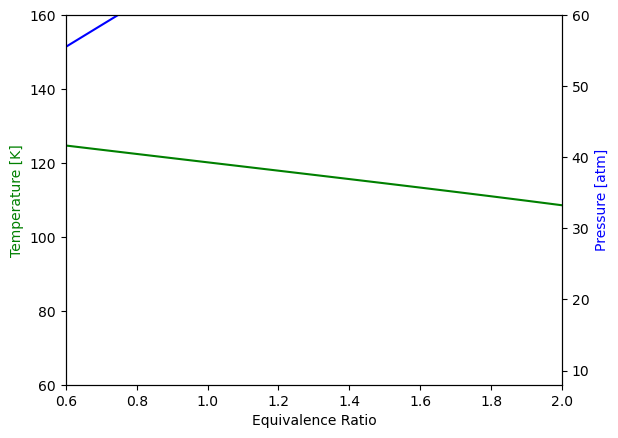

In [48]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(phi,T_crit_list, 'g-', label='$Critical Temperature$')
ax2.plot(phi,p_crit_list, 'b-', label='$Critical Pressure$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Temperature [K]', color='g')
ax2.set_ylabel('Pressure [atm]', color='b')
ax1.set_xlim(0.6, 2)  # Set x-axis limits from 0 to 5
ax1.set_ylim(60, 160)  # Set y-axis limits from -0.5 to 0.5
ax2.set_xlim(0.6, 2)  # Set x-axis limits from 0 to 5
ax2.set_ylim(8, 60)  # Set y-axis limits from -0.5 to 0.5

plt.show()

Temperature is lower than pure O2 (expected) \
But Pcrit keeps balooning the more Hydrogen I add!

This is entirely different compared to what Law et al get